IRIS PROJECT


In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

Read the dataset

In [2]:
import pandas as pd
df = pd.read_csv('iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [24]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

# Iris Dataset Explained


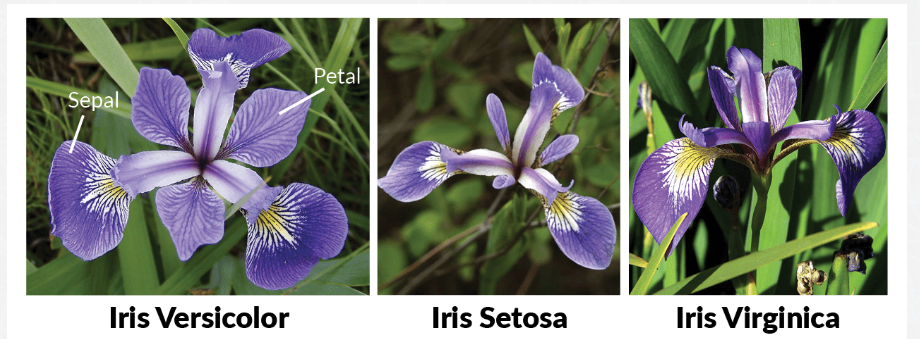image.png

## Separate X and Y

In [12]:
X = df.drop(labels = ['species'],axis=1)
Y = df[['species']]

In [13]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [14]:
Y

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa
...,...
145,virginica
146,virginica
147,virginica
148,virginica


In [15]:
Y.value_counts()

species   
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

## Apply Label encoding on Y

In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


In [17]:
Y['species'] = le.fit_transform(Y['species'])

In [18]:
Y.head()

,species
0,0
1,0
2,0
3,0
4,0


In [19]:
Y.value_counts()

species
0          50
1          50
2          50
Name: count, dtype: int64

## Save your Label Encoder

In [20]:
import pickle
with open('LabelEnc.pkl','wb') as file:
    pickle.dump(le,file)

## Perform Standard Scaling on the Data

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_pre = pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
X_pre

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


### save the scaler in pkl file

In [22]:
with open('scaler.pkl','wb') as file:
    pickle.dump(scaler,file)

## Train Test Split

In [25]:
from sklearn.model_selection import train_test_split
xtrain, xtest , ytrain , ytest = train_test_split(X_pre,Y , test_size=0.20, random_state=42)

In [26]:
xtrain.shape

(120, 4)

In [27]:
xtest.shape

(30, 4)

## Create KNN model with Hyperparametre tuning

In [28]:
params = {'n_neighbors':[3,4,5,6,7,8,9]}

In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
knnc = KNeighborsClassifier()
gscv = GridSearchCV(knnc ,param_grid=params , cv=5 , scoring='f1_macro')
gscv.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 4, 5, 6, 7, 8, 9]},
             scoring='f1_macro')

In [30]:
gscv.best_score_

0.949134576007641

In [31]:
best_knn = gscv.best_estimator_
best_knn

KNeighborsClassifier(n_neighbors=3)

### Save the model in pickle file

In [32]:
with open('model.pkl','wb') as file:
    pickle.dump(best_knn,file)

### Evaluate the Model

In [35]:
# accuracy in Training
best_knn.score(xtrain,ytrain)

0.9416666666666667

In [36]:
# accuracy in Testing
best_knn.score(xtest,ytest)

1.0

## Plot the Confusion Matrix

In [37]:
ypred_tr = best_knn.predict(xtrain)
ypred_ts = best_knn.predict(xtest)

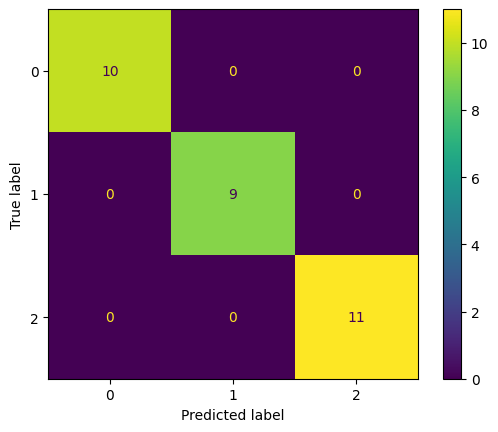

In [40]:
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay
cfd = ConfusionMatrixDisplay(cf,display_labels = best_knn.classes_)
cfd.plot()

### Print classification Report

In [41]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred_ts))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## checking The predictions

In [42]:
ypred_tr[0:5]

array([0, 0, 1, 0, 0])

In [43]:
ypred_ts[0:5]

array([1, 0, 2, 1, 1])

In [44]:
ytest.head()

,species
73,1
18,0
118,2
78,1
76,1


## Get the actual Labels

In [45]:
ypred_tr_lb = le.inverse_transform(ypred_tr)
ypred_ts_lb = le.inverse_transform(ypred_ts)

In [46]:
ypred_ts

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [47]:
ypred_ts_lb

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'setosa', 'setosa', 'setosa', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'setosa', 'setosa'], dtype=object)

### predict a new Data point

In [53]:
def predict_data(scaler, le, model):
    # Take the input from user
    sep_l = float(input('Please Enter Sepal Length  : '))
    sep_w = float(input('Please Enter Sepal Width   : '))
    pet_l = float(input('Please Enter Petal Length  : '))
    pet_w = float(input('Please Enter Petal Width   : '))

    # Convert above into dataframe
    xnew = pd.DataFrame([sep_l,sep_w,pet_l,pet_w]).T
    xnew.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
    print('DataFrame Before Preprocessing : \n')
    display(xnew)

    # Preprocess the dataframe
    xnew_pre = pd.DataFrame(scaler.transform(xnew),columns=xnew.columns)
    print('DataFrame after Preprocessing :\n')
    display(xnew_pre)

    # Perform the prediction
    pred = model.predict(xnew_pre)

    # Inverse Tranform using le
    pred1 = le.inverse_transform(pred)

    # Probability
    prob = model.predict_proba(xnew_pre).max()

    # Print the prediction with probanility
    print('\n=======================================================\n')
    print(f'Prediction  : {pred1[0]}')
    print(f'Probability : {prob:.4f}')

    return pred1[0], prob                                                   


In [54]:
predict_data(scaler , le , best_knn)

DataFrame Before Preprocessing : 



,sepal_length,sepal_width,petal_length,petal_width
0,5.5,3.8,2.4,1.1


DataFrame after Preprocessing :



,sepal_length,sepal_width,petal_length,petal_width
0,-0.41601,1.709595,-0.771852,-0.130755




Prediction  : setosa
Probability : 1.0000


('setosa', 1.0)